In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # Adds nice background to graphs
%matplotlib inline

In [2]:
# Laoding dataset to pandas dataframe
Bank_client_df = pd.read_csv("bank-full.csv")

In [3]:
# Displaying first five rows of dataframe.
Bank_client_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#Checking shape of data
Bank_client_df.shape

(45211, 17)

In [5]:
Bank_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Checking null value in dataframe
Bank_client_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
# Checking distribution of numeric features.
Bank_client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


` From above we can say that 'balance' have negative values but that is okay as person can have overdraft facility `

In [8]:
# Checking number of unique values to check if there is any bad data
Bank_client_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

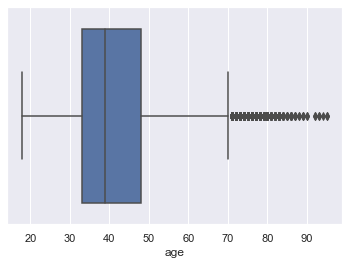

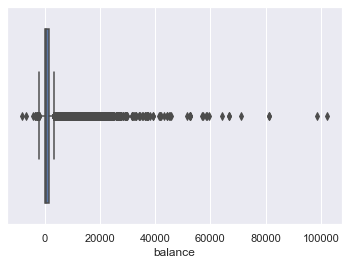

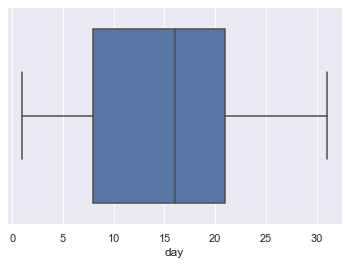

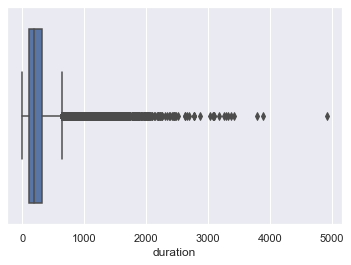

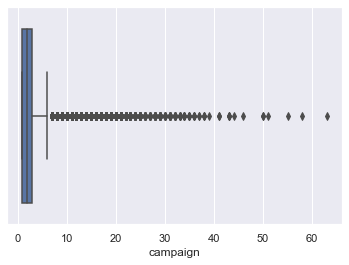

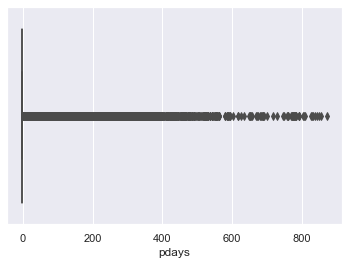

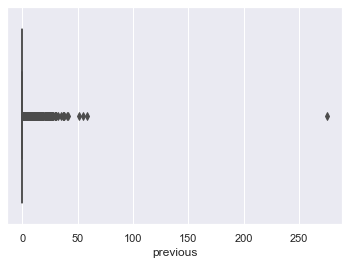

In [9]:
# Performing univariate analysis for feature with datatype as integer.
for feature in Bank_client_df.columns:
    if Bank_client_df[feature].dtype == 'int64':
            sns.boxplot(Bank_client_df[feature])
            plt.show()

~`From above analysis we can say that, except 'day' variables rest all of the data have ouliers and all are heavily right skewed`. 

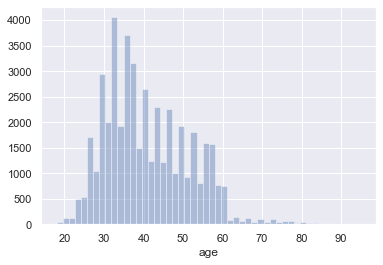

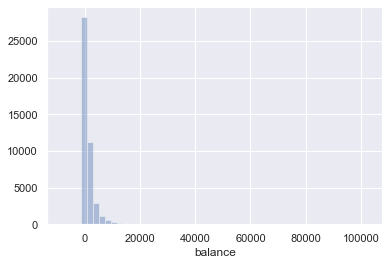

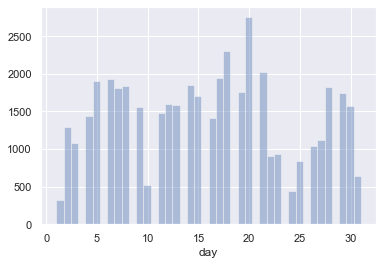

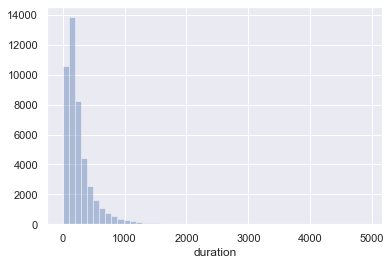

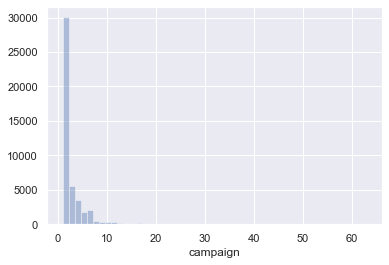

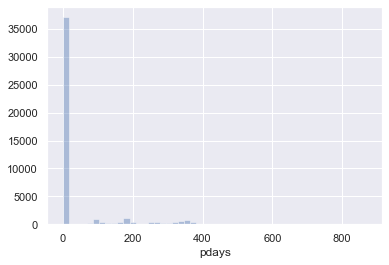

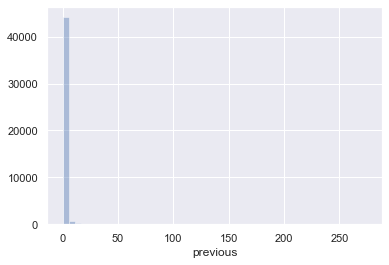

In [10]:
# Performing univariate analysis for fature with datatype as integer.
for feature in Bank_client_df.columns:
    if Bank_client_df[feature].dtype == 'int64':
            sns.distplot(Bank_client_df[feature],kde=False)
            plt.show()

In [11]:
#Identify duplicate records in the data
dupes = Bank_client_df.duplicated()
sum(dupes)

0

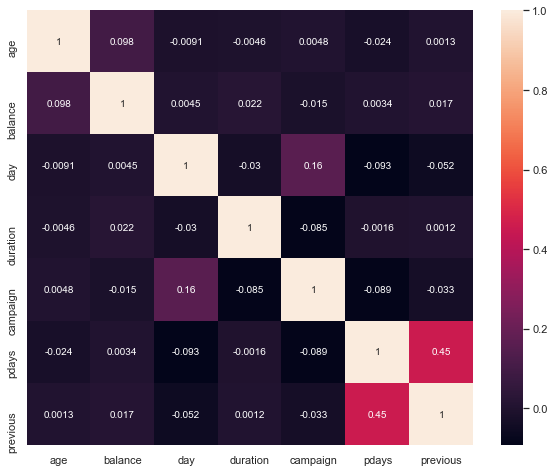

In [12]:
# Identify correlation among different data point using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Bank_client_df.corr(),annot=True)

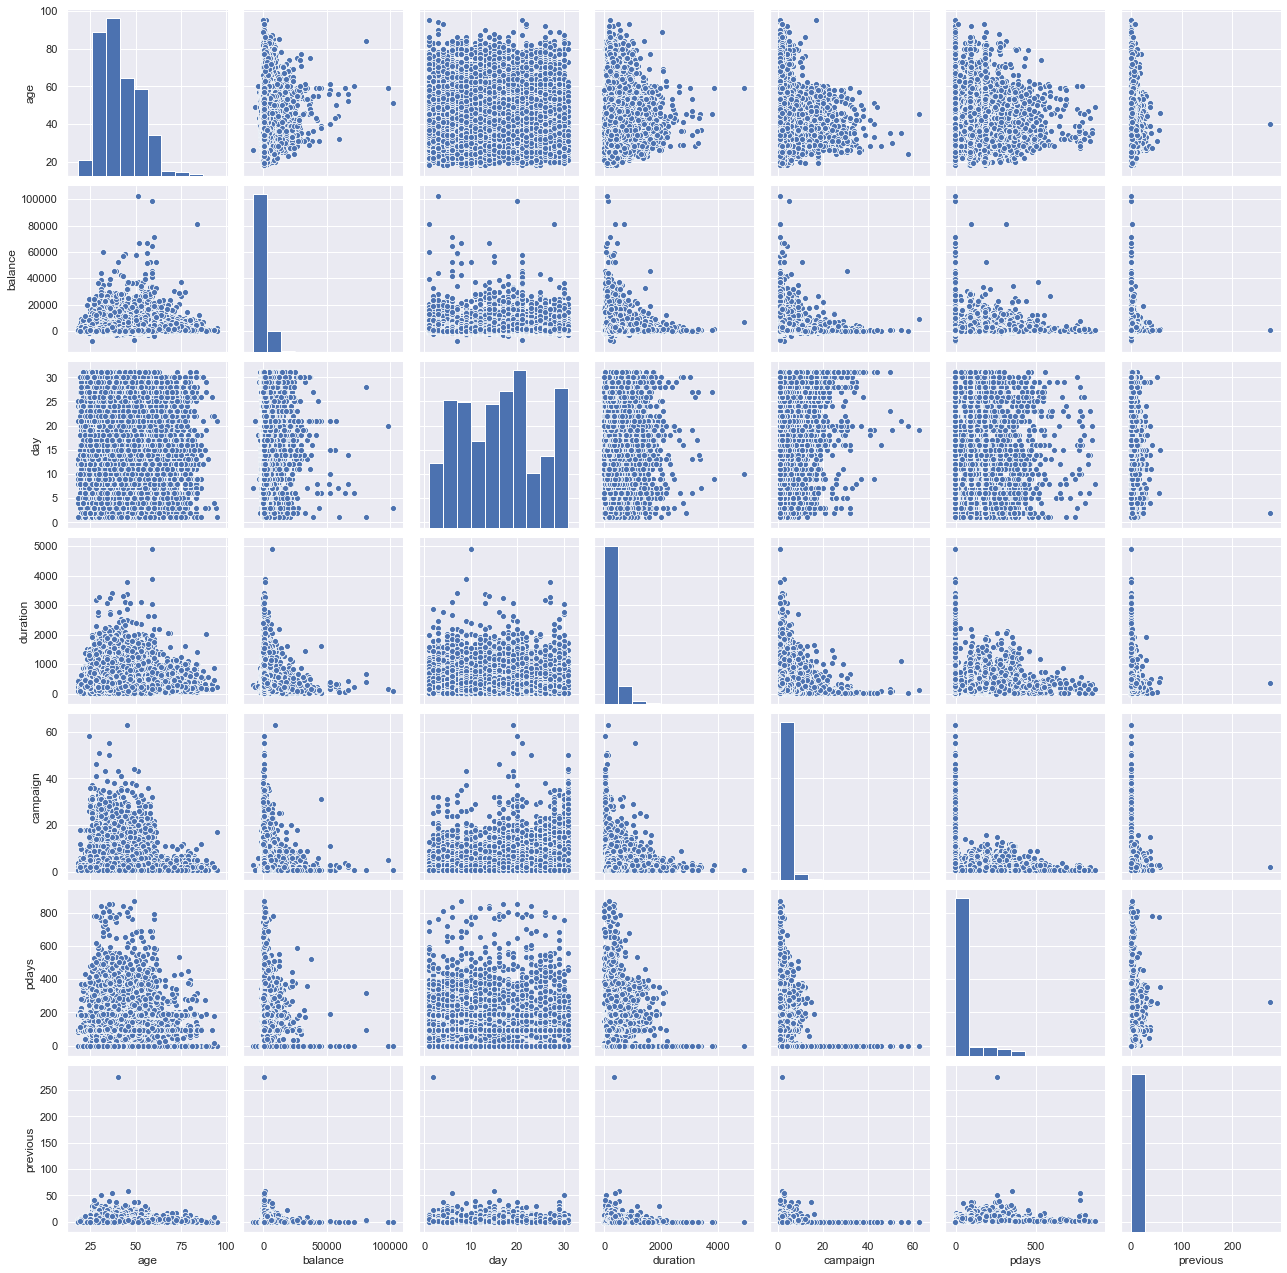

In [15]:
# Creating pairplot to get relation between different int variable
sns.pairplot(Bank_client_df)

In [13]:
Bank_client_df[Bank_client_df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


`this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.`

In [14]:
# dropping the duration column
Bank_client_df.drop(['duration'],axis=1,inplace=True)

In [15]:
Bank_client_df.info() # duration column droppped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  Target     45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


### Replacing outlier with IQR methods

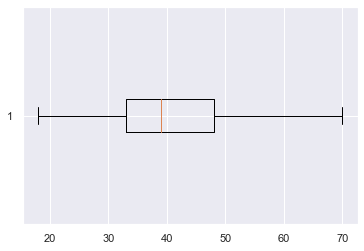

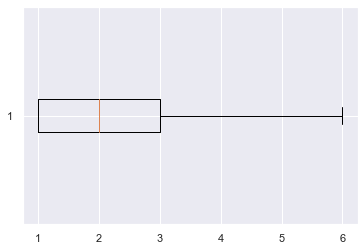

In [16]:
# Using IQR method imputing outlier data with median for following features
features = ['age','campaign'] # creating list of features
for feature in features:
    q1 = Bank_client_df[feature].quantile(0.25) # calculating quartile 1
    q3 = Bank_client_df[feature].quantile(0.75) # calculating quartile 3
    IQR = q3-q1
    Lower_tail = q1 - 1.5 * IQR # Lower tail of IQR
    Upper_tail = q3 + 1.5 * IQR # Upper tail of IQR
    Bank_client_df.loc[(Bank_client_df[feature] > Upper_tail) | (Bank_client_df[feature] < Lower_tail),feature]=np.median(Bank_client_df[feature]) 

            
# Visualizing feature after outlier imputation using boxplot            
for i in features:
    plt.boxplot(Bank_client_df[i],vert=False,)
    plt.show()


count    45211.000000
mean        73.871592
std         86.628527
min          1.000000
25%         40.197828
50%         40.197828
75%         40.197828
max        871.000000
Name: pdays, dtype: float64

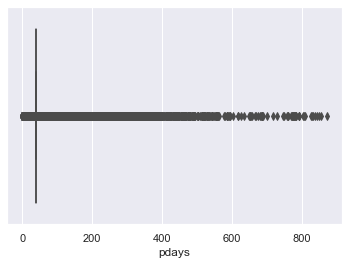

In [17]:
# Here pdays column have '-1' as value, which can be replaced with mean
Bank_client_df['pdays'].replace(-1,Bank_client_df['pdays'].mean(),inplace=True)
sns.boxplot(Bank_client_df['pdays'])
Bank_client_df['pdays'].describe()

#### we can see that after imputing value with mean pdays still have high value of outliers

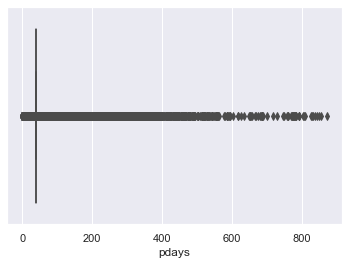

In [18]:
# Now imputing ouliers for pdays feature with median value of age column
for i in Bank_client_df['pdays']:
    q1 = Bank_client_df['pdays'].quantile(0.25)
    q3 = Bank_client_df['pdays'].quantile(0.75)
    IQR = q3-q1
    Lower_tail = q1 - 1.5 * IQR
    Upper_tail = q3 + 1.5 * IQR
    Bank_client_df.loc[(Bank_client_df['pdays'] > Upper_tail) | (Bank_client_df['pdays'] < Lower_tail),feature]=np.median(Bank_client_df['pdays']) 

sns.boxplot(Bank_client_df['pdays'])

In [19]:
Bank_client_df.pdays

0         40.197828
1         40.197828
2         40.197828
3         40.197828
4         40.197828
            ...    
45206     40.197828
45207     40.197828
45208    184.000000
45209     40.197828
45210    188.000000
Name: pdays, Length: 45211, dtype: float64

In [20]:
# Performing oulier impution using zscore method for previous column
# Importing stats module from scipy package
from scipy import stats
z = np.abs(stats.zscore(Bank_client_df['previous'])) # calculating z-score for "previous" column
print(z)

[0.25194037 0.25194037 0.25194037 ... 1.05047333 0.25194037 4.52357654]


In [21]:
threshold = 3 # defining threshold as 3, which will cover 99% of data,  rest we can consider as outlier.
lst = []
for i in np.where(z > threshold):
    Bank_client_df['previous'].iloc[i] = Bank_client_df['previous'].median() # Set value to median of column for value out of 3 standard deviation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


count    45211.000000
mean         0.412687
std          1.119789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

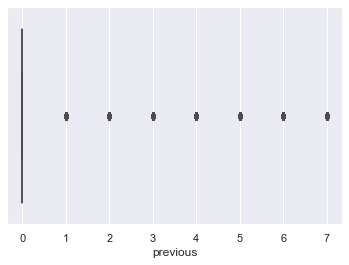

In [22]:
sns.boxplot(Bank_client_df['previous'])
Bank_client_df['previous'].describe()

In [23]:
Bank_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  campaign   45211 non-null  float64
 12  pdays      45211 non-null  float64
 13  previous   45211 non-null  float64
 14  poutcome   45211 non-null  object 
 15  Target     45211 non-null  object 
dtypes: float64(4), int64(2), object(10)
memory usage: 5.5+ MB


In [24]:
#for feature in Bank_client_df.columns: # Loop through all columns in the dataframe
#    if Bank_client_df[feature].dtype == 'object': # Only apply for columns with categorical strings
#        Bank_client_df[feature] = pd.Categorical(Bank_client_df[feature])# Replace strings with an category
#Bank_client_df.head(10)

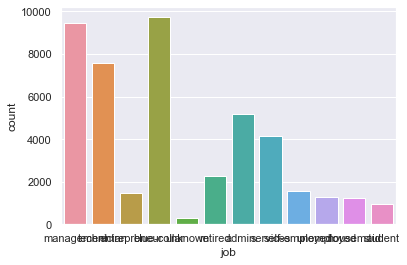

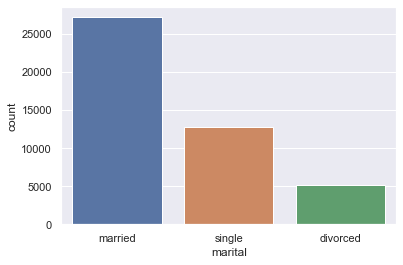

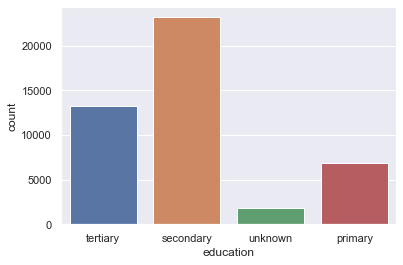

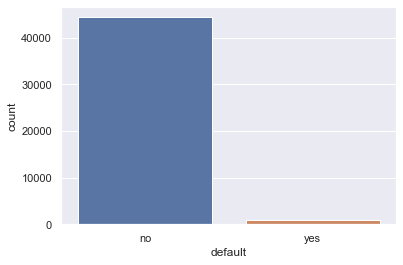

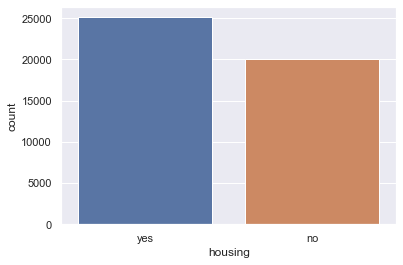

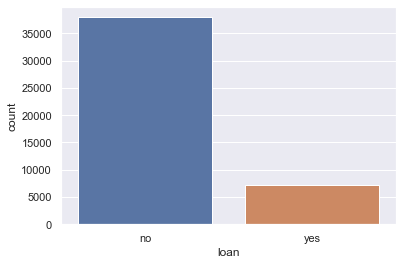

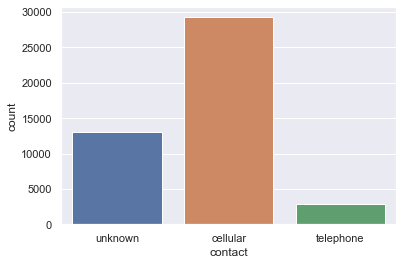

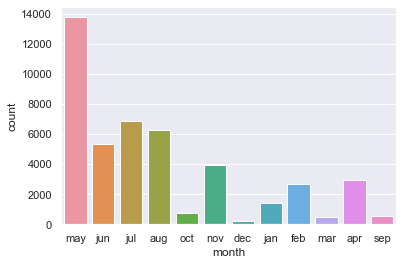

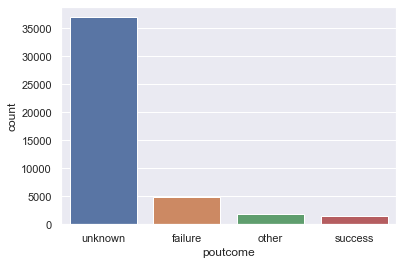

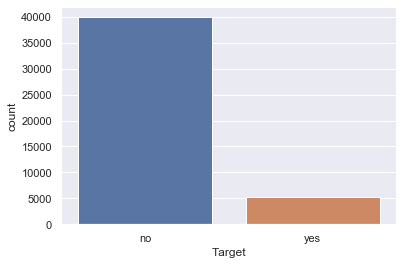

In [25]:
# performing univariate analyis for all categorical columns
for col in list(Bank_client_df.columns):
    if Bank_client_df[col].dtypes == 'object':
        sns.countplot(Bank_client_df[col])
        plt.show()

In [26]:
# checking value counts of all object type columns
for i in list(Bank_client_df.columns[Bank_client_df.dtypes=='object']):
    print(Bank_client_df[i].value_counts(normalize=True))
    print()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64

yes    0.555838
no     0.444162
Name: housing, dtype: float64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar

`we can drop poutcome as most of the values are unknown`

`Target variable is imbalanced but still 'yes' class is around 11%, so we can leave data imbalance treatment`

In [27]:
# Dropping 'poutcome' varaible as most of value are unknown
Bank_client_df.drop('poutcome',axis=1,inplace=True)

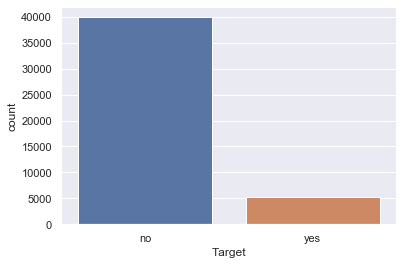

In [28]:
# creating count plot to see visual representation of target variable.
sns.countplot(Bank_client_df['Target'])

In [29]:
Bank_client_df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

`Here response rate for 'yes' is only 11.6%. Hence accuracy can not be a reliable model performance measure`

`FN is very important parameter for this business case because a false negative is a customer who will potentially subscribe for term deposit has been classified as not subscribing for term deposit. In that case recall going to be most relevant model performance metrics.`

### Perform bivariate analysis between target variable and independant variable

In [30]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['month'],normalize=True)

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
no,0.052089,0.122957,0.002522,0.048838,0.027891,0.138639,0.106058,0.005065,0.284024,0.078897,0.009179,0.006857
yes,0.012762,0.015218,0.002212,0.009754,0.003141,0.013868,0.012077,0.005485,0.020460,0.008914,0.007144,0.005950


- From above analysis we can say that, highest change of customer subscribing for term deposit is in month of may and highest rejection rate is also in may. Quite interesting. May be this kind of result because we have less amount of data with target value of 'yes'.

In [31]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['contact'],normalize=True)

contact,cellular,telephone,unknown
Target,,,
no,0.551105,0.055650,0.276260
yes,0.096636,0.008626,0.011723


- from above analysis we can say that, people contact over phone have high chance of not subscribing for term deposit

In [32]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['loan'],normalize=True)

loan,no,yes
Target,,
no,0.733494,0.149521
yes,0.106279,0.010705


- client with no loan have high chance of not subscribing for term deposit

In [33]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['housing'],normalize=True)

housing,no,yes
Target,,
no,0.369976,0.513039
yes,0.074185,0.042799


- client with hosuing loan have high rate of not subscribing for term deposit

In [34]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['default'],normalize=True)

default,no,yes
Target,,
no,0.866139,0.016876
yes,0.115835,0.001150


- client with no credit default history have very low rate for subscribing for term deposit

In [35]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['education'],normalize=True)

education,primary,secondary,tertiary,unknown
Target,,,,
no,0.138462,0.459003,0.250050,0.035500
yes,0.013072,0.054190,0.044149,0.005574


- client with secondary education have less rate of subscribing for term deposit

In [36]:
pd.crosstab(Bank_client_df['Target'],Bank_client_df['marital'],normalize=True)

marital,divorced,married,single
Target,,,
no,0.101413,0.540997,0.240605
yes,0.013758,0.060936,0.042291


- client with married status have high chance of not subsribing to term deposit

In [37]:
pd.crosstab(Bank_client_df['job'],Bank_client_df['Target'],normalize=True)

Target,no,yes
job,,
admin.,0.100418,0.013957
blue-collar,0.199597,0.015660
entrepreneur,0.030170,0.002721
housemaid,0.025016,0.002411
management,0.180421,0.028776
retired,0.038663,0.011413
self-employed,0.030789,0.004136
services,0.083719,0.008162
student,0.014797,0.005950


- Data is quite distributed. still client with job title as technician have less chance of subscribing for term desposit

In [38]:
# Create copy of data

In [39]:
# Convert categorical variable to dummy variables
oneHotCols = ['job','marital','education','default','housing','loan','contact','month']
Bank_client_df=pd.get_dummies(Bank_client_df, columns=oneHotCols,drop_first=True)
Bank_client_df.head()

,age,balance,day,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,2143,5,1.0,40.197828,0.0,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44.0,29,5,1.0,40.197828,0.0,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33.0,2,5,1.0,40.197828,0.0,no,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47.0,1506,5,1.0,40.197828,0.0,no,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33.0,1,5,1.0,40.197828,0.0,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
Bank_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  int64  
 2   day                  45211 non-null  int64  
 3   campaign             45211 non-null  float64
 4   pdays                45211 non-null  float64
 5   previous             45211 non-null  float64
 6   Target               45211 non-null  object 
 7   job_blue-collar      45211 non-null  uint8  
 8   job_entrepreneur     45211 non-null  uint8  
 9   job_housemaid        45211 non-null  uint8  
 10  job_management       45211 non-null  uint8  
 11  job_retired          45211 non-null  uint8  
 12  job_self-employed    45211 non-null  uint8  
 13  job_services         45211 non-null  uint8  
 14  job_student          45211 non-null  uint8  
 15  job_technician       45211 non-null 

In [41]:
# Performing Label encoding for target variable
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()

Bank_client_df['Target_Encoded'] = labelencoder.fit_transform(Bank_client_df['Target'])

In [42]:
Bank_client_df['Target_Encoded']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target_Encoded, Length: 45211, dtype: int32

### Building logistic regression model

In [47]:
# Import all libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
## Define X and Y variable
X = Bank_client_df.drop(['Target','Target_Encoded'],axis=1) # Indepedant variable
Y = Bank_client_df.pop('Target_Encoded') # dependant variable

In [49]:
#Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30,random_state=1)

# used liblinear solver for better model performance because liblinear is a good choice for small dataset
logreg = LogisticRegression(random_state=1,solver='liblinear')

logreg.fit(X_train,Y_train) # fitting model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Creating different blank list to store different model performance parameters to display comparative data
Algorthm_Name = []
Training_Score = []
Testing_Score = []
Accuracy_Score = []
Recall = []
Precision = []
f1_Score = []
ROC_AUC_Score = []

In [51]:
Algorthm_Name.append('Logistic Regression')
logreg.score(X_test,Y_test) # calculating testing/out of sample accuracy
Training_Score.append(logreg.score(X_test,Y_test)) # Adding to list

In [52]:
logreg.score(X_train,Y_train) # calculating tarining/in sample accuracy
Testing_Score.append(logreg.score(X_train,Y_train)) # Adding to list

In [53]:
# Predicting target variable on test data
y_predict = logreg.predict(X_test)

In [54]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,y_predict))
print()
print("Recall score: ",metrics.recall_score(Y_test,y_predict))
print()
print("Precision score :",metrics.precision_score(Y_test,y_predict))
print()
print("F1 Score: ",metrics.f1_score(Y_test,y_predict))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,y_predict))

Accuracy score:  0.8871276909466234

Recall score:  0.10573823339780787

Precision score : 0.5324675324675324

F1 Score:  0.1764389456697149

Roc Auc Score 0.5468756096648575


In [55]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,y_predict))
Recall.append(metrics.recall_score(Y_test,y_predict))
Precision.append(metrics.precision_score(Y_test,y_predict))
f1_Score.append(metrics.f1_score(Y_test,y_predict))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,y_predict))

In [56]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

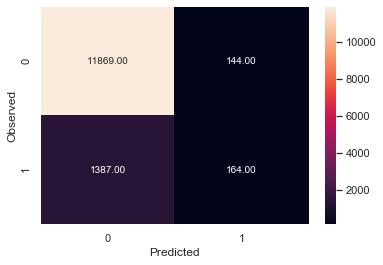

None


In [57]:
print(draw_cm(Y_test,y_predict))

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic regression'], 'accuracy': metrics.accuracy_score(Y_test,y_predict)})
#resultsDf
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic regression,0.887128


### Building decision tree

In [58]:
# importing all libraries:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [59]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1,max_depth=3)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [60]:
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

0.8824217145385028
0.8852845768209967


In [61]:
# Adding respective model name and thier training and testing scores
Algorthm_Name.append('Decision Tree')
Training_Score.append(dTree.score(X_train, Y_train))
Testing_Score.append(dTree.score(X_test, Y_test))

In [62]:
# Calculating feature importance and listing down top ten features which adding intelligence to model
feature_col = X_train.columns
feat_imp_dict = dict(zip(feature_col,dTree.feature_importances_))
feature_imp = pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feature_imp.sort_values(by=0,ascending=False)[0:10]

,0
contact_unknown,0.394325
pdays,0.377630
housing_yes,0.187883
month_oct,0.016189
marital_married,0.012722
day,0.011252
age,0.000000
month_dec,0.000000
loan_yes,0.000000
contact_telephone,0.000000


`'Contact_unknown','pdays','housing_yes','month_oct' mainly adding intelligence to model`

In [63]:
# Predicting target variable on test data
pred_DT = dTree.predict(X_test)

In [64]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,pred_DT))
print()
print("Recall score: ",metrics.recall_score(Y_test,pred_DT))
print()
print("Precision score :",metrics.precision_score(Y_test,pred_DT))
print()
print("F1 Score: ",metrics.f1_score(Y_test,pred_DT))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,pred_DT))

Accuracy score:  0.8852845768209967

Recall score:  0.012250161186331399

Precision score : 0.4418604651162791

F1 Score:  0.02383939774153074

Roc Auc Score 0.505126162754158


`Here recall drop drastically after using pruned decision tree`

In [65]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,pred_DT))
Recall.append(metrics.recall_score(Y_test,pred_DT))
Precision.append(metrics.precision_score(Y_test,pred_DT))
f1_Score.append(metrics.f1_score(Y_test,pred_DT))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,pred_DT))

### Apply RandomForest Classifier

In [67]:
# Importing libraries for randomforest calssifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [68]:
# Calculating Training and testing score for randomforest classifier
print(rfcl.score(X_train, Y_train))
print(rfcl.score(X_test, Y_test))

0.999146838562897
0.8876437629017989


`Testing score really went high, which looks model performed well on testing data`

In [69]:
# Adding respective model name and thier training and testing scores
Algorthm_Name.append('RandomForest Classifier')
Training_Score.append(rfcl.score(X_train, Y_train))
Testing_Score.append(rfcl.score(X_test, Y_test))

In [70]:
# Predicting target variable on test data
pred_rf = rfcl.predict(X_test)

In [71]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,pred_rf))
print()
print("Recall score: ",metrics.recall_score(Y_test,pred_rf))
print()
print("Precision score :",metrics.precision_score(Y_test,pred_rf))
print()
print("F1 Score: ",metrics.f1_score(Y_test,pred_rf))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,pred_rf))

Accuracy score:  0.8876437629017989

Recall score:  0.2082527401676338

Precision score : 0.5218093699515347

F1 Score:  0.29769585253456227

Roc Auc Score 0.5918063834027214


In [72]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,pred_rf))
Recall.append(metrics.recall_score(Y_test,pred_rf))
Precision.append(metrics.precision_score(Y_test,pred_rf))
f1_Score.append(metrics.f1_score(Y_test,pred_rf))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,pred_rf))

### Apply Bagging Classifier:

In [73]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [74]:
# Calculating Training and testing score for Bagging classifier
print(bgcl.score(X_train, Y_train))
print(bgcl.score(X_test, Y_test))

0.8818845388188454
0.8856531996461221


In [75]:
# Adding respective model name and their training and testing scores
Algorthm_Name.append('Bagging Classifier')
Training_Score.append(bgcl.score(X_train, Y_train))
Testing_Score.append(bgcl.score(X_test, Y_test))

In [77]:
pred_bg = bgcl.predict(X_test)

In [132]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,pred_bg))
print()
print("Recall score: ",metrics.recall_score(Y_test,pred_bg))
print()
print("Precision score :",metrics.precision_score(Y_test,pred_bg))
print()
print("F1 Score: ",metrics.f1_score(Y_test,pred_bg))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,pred_bg))

Accuracy score:  0.8856531996461221

Recall score:  0.0

Precision score : 0.0

F1 Score:  0.0

Roc Auc Score 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,pred_bg))
Recall.append(metrics.recall_score(Y_test,pred_bg))
Precision.append(metrics.precision_score(Y_test,pred_bg))
f1_Score.append(metrics.f1_score(Y_test,pred_bg))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,pred_bg))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying Adaptive Boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=1)

In [81]:
# Calculating Training and testing score for Bagging classifier
print(abcl.score(X_train, Y_train))
print(abcl.score(X_test, Y_test))

0.8837172559800297
0.8870539663815984


In [82]:
# Adding respective model name and their training and testing scores
Algorthm_Name.append('AdaBoosting Classifier')
Training_Score.append(abcl.score(X_train, Y_train))
Testing_Score.append(abcl.score(X_test, Y_test))

In [83]:
pred_ab = abcl.predict(X_test)

In [84]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,pred_ab))
print()
print("Recall score: ",metrics.recall_score(Y_test,pred_ab))
print()
print("Precision score :",metrics.precision_score(Y_test,pred_ab))
print()
print("F1 Score: ",metrics.f1_score(Y_test,pred_ab))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,pred_ab))

Accuracy score:  0.8870539663815984

Recall score:  0.09477756286266925

Precision score : 0.5345454545454545

F1 Score:  0.16100766703176342

Roc Auc Score 0.5420612196232933


In [85]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,pred_ab))
Recall.append(metrics.recall_score(Y_test,pred_ab))
Precision.append(metrics.precision_score(Y_test,pred_ab))
f1_Score.append(metrics.f1_score(Y_test,pred_ab))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,pred_ab))

### Applying Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [87]:
# Calculating Training and testing score for Bagging classifier
print(gbcl.score(X_train, Y_train))
print(gbcl.score(X_test, Y_test))

0.8874142888741429
0.8867590681214981


In [88]:
# Adding respective model name and their training and testing scores
Algorthm_Name.append('GradientBoosting Classifier')
Training_Score.append(gbcl.score(X_train, Y_train))
Testing_Score.append(gbcl.score(X_test, Y_test))

In [89]:
pred_gb = gbcl.predict(X_test)

In [90]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(Y_test,pred_gb))
print()
print("Recall score: ",metrics.recall_score(Y_test,pred_gb))
print()
print("Precision score :",metrics.precision_score(Y_test,pred_gb))
print()
print("F1 Score: ",metrics.f1_score(Y_test,pred_gb))
print()
print("Roc Auc Score",metrics.roc_auc_score(Y_test,pred_gb))

Accuracy score:  0.8867590681214981

Recall score:  0.08961960025789813

Precision score : 0.5285171102661597

F1 Score:  0.15325248070562292

Roc Auc Score 0.5396487246274091


In [91]:
# Adding all metric data to corresponding list
Accuracy_Score.append(metrics.accuracy_score(Y_test,pred_gb))
Recall.append(metrics.recall_score(Y_test,pred_gb))
Precision.append(metrics.precision_score(Y_test,pred_gb))
f1_Score.append(metrics.f1_score(Y_test,pred_gb))
ROC_AUC_Score.append(metrics.roc_auc_score(Y_test,pred_gb))

In [131]:
# Creating dataframe to compare results
Model_comparision = pd.DataFrame(Algorthm_Name)

Model_comparision['Training_Score'] = Training_Score
Model_comparision['Testing_Score'] = Testing_Score
Model_comparision['Accuracy_Score'] = Accuracy_Score
Model_comparision['Recall'] = Recall
Model_comparision['Precision'] = Precision
Model_comparision['f1_Score'] = f1_Score
Model_comparision['ROC_AUC_Score'] = ROC_AUC_Score
Model_comparision

,0,Training_Score,Testing_Score,Accuracy_Score,Recall,Precision,f1_Score,ROC_AUC_Score
0,Logistic Regression,0.887128,0.883243,0.887128,0.105738,0.532468,0.176439,0.546876
1,Decision Tree,0.882422,0.885285,0.885285,0.012250,0.441860,0.023839,0.505126
2,RandomForest Classifier,0.999147,0.887644,0.887644,0.208253,0.521809,0.297696,0.591806
3,Bagging Classifier,0.881885,0.885653,0.885653,0.000000,0.000000,0.000000,0.500000
4,AdaBoosting Classifier,0.883717,0.887054,0.887054,0.094778,0.534545,0.161008,0.542061
5,GradientBoosting Classifier,0.887414,0.886759,0.886759,0.089620,0.528517,0.153252,0.539649


#### confusion matrix

True Positive(observed = 1, Predicted = 1)
Customer subscribed to term deposit and model predicted that customer will subscribe for term deposit

False Positive(observed = 0, predicted = 1)
Customer did not subscribe to term deposit but model predicted that customer will subscribe to term deposit

True Negative(Observed = 0, Predicted = 0)
Customer did not subscribe to term deposit and model also predicted that customer will not subscribe for term deposit

False Negative(Oberved = 1, Predicted = 0)
Customer subscribed to term deposit but model predicted that customer won't subscribe to term deposit

Here company wants more people to subscribe to term deposit, budget is not constraint. Hence we have customers who willing to subscribe then we should not loose the customer.So, we need to reduce False Negative in turn increasing recall.

#### RandomForest give overall best model among all, however we need to note that recall is still very low and that we need to improve.